<a href="https://colab.research.google.com/github/yesiltepe-hidir/style-swin-gan/blob/v2/main_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paper Information**

## **StyleSwin: Transformer-based GAN for High-resolution Image Generation**

* **Paper Link:** https://arxiv.org/pdf/2112.10762.pdf
* **Authors:**  Bowen Zhang, Shuyang Gu, Bo Zhang, Jianmin Bao, Dong Chen, Fang Wen, Yong Wang, Baining Guo
* **Conference:** CVPR 2022

## **Project Group Members:**
* Alpay Özkan, alpay.ozkan@metu.edu.tr
* Hıdır Yeşiltepe, hidir.yesiltepe@metu.edu.tr

# **Paper Summary**

🔑 This section covers the fundamental ideas & motivation of the paper as well as the proposed architecture.  

## **Introduction**

⭐ The main motivation of the paper is creating a pure transformer based image generative GAN model that is capable of competing against convolution based generative GAN models in high-resolution image synthesis task which at the end yields **state of the art results** on high resolution image generation task. To better understand the idea let's take a look at the  Generator and the Discriminator overview.

## **Generator Overview**

⚡ Authors use Swin Transformer blocks in the Generator along with the style injection mechanism. Swin Transformer uses window based Multi-Head Self Attention (MSA), which has linear cost with respect to image size as compared to global attention used in ViT with quadratic cost. This complexity reduction comes with a cost: Since attention is applied window by window manner, spatial coherency is broken and this result in blocking artifacts occurring in the inference time. As an attempt to increase the receptive field and consequently long range dependency authors propose to use double attention.

### **Generator Architecture**

This section covers the backbone architecture along with the two important mechanism proposed by the paper:
1. **Style Injection**
2. **Double Attention Mechanism**

<center><img src="https://miro.medium.com/max/784/1*8C9_aikKqS5UrBFaJP5Nbg.png"/></center>

<p align='center'><b>Figure 1:</b> StlyeSwin Generator Architecture</p>

### **Style Injection**

⚡ Latent code sampled from normal distribution and is given to style injection layer which consists of 8 Fully Connected layers. Then obtained style vector is given 2 times (1 for each Adaptive Instance Normalization Layer) to each transformer block after a linear mapping hence the block is named “A” which stands for affine.

~~~
                                                     Why not giving style vector directly instead of applying linear mapping?
~~~

To find the answer, we first need to operation performed by Adaptive Instance Normalization (AdaIN Layer):

<center><img src="https://miro.medium.com/max/904/1*ijZsM5ZXN2Z25UO_26GzTg.png"/></center>

<p align='center'><b>Equation 1:</b> Equation performed by Adaptive Instance Normalization. Given feature map x is normalized with respect to parameters of style y. In other words, mean and variance of x are channel-wise aligned to match those of y.</p>

To better understand the process performed by AdaIN Layer, suppose that we have the following tensor, x, as:

<center><img src="https://miro.medium.com/max/1090/1*PqyGXagTulTIhHohpBxEKA.png"/></center>

<p align='center'><b>Figure 2:</b> (Left) For the sake of understanding, consider the given tensor as x which consists of 3 channels and has [3 x 3] spatial dimension. (Right) This tensor consists of 3 separate feature maps: 1 for each channels, on the right 1 feature map is shown.</p>

Then for each separate feature map, mean and variance are calculated. For one feature map operations performed by AdaIN Layer are as follows:

<center><img src="https://miro.medium.com/max/1202/1*RdFrcoOcUtiza58gA0Dy6w.png"/></center>

<p align='center'><b>Equation 2:</b> Operations performed by Adaptive Instance Normalization. Mean and variance of each channel is calculated and then it is aligned with the mean and variance of the given style vector. An important note here, each separate channel is aligned differently, meaning that uses different scalar mean(y) and var(y).</p>

❓ **Now, we come back to the question:** Why not giving style vector directly instead of applying linear mapping? Since each channel (feature map) is aligned differently we need to learn different mean and variance for each separate channel using style vector. If style vector belongs to W dimensional space (notation used in paper, see Figure 16), with affine mapping it is mapped to C dimensional space where C is the channel dimension.

## **Double Attention**

In order to achieve larger receptive field and obtain improved generation quality, authors propose Double Attention mechanism.

<center><img src="https://miro.medium.com/max/476/1*vN4zaxeMfwc7Coj4F2WNoA.png"/></center>

<p align='center'><b>Figure 3:</b> Double Attention Mechanism</p>


To get an in-depth understanding we need to know how the attention mechanism works in Swin Transformers. Below you see the architecture of Swin Transformer from the paper: https://arxiv.org/pdf/2103.14030.pdf

<center><img src="https://miro.medium.com/max/1400/1*w3WCskxK4qFUEkiv3a1CtQ.png"/></center>


<p align='center'><b>Figure 4:</b> Swin Transformer Architecture</p>

📔 Note that each block contains two successive **Transformer Block** and the only thing that differs themselves is the type of attention being applied, namely **W-MSA** (Window Multi-Head Self Attention) and **SW-MSA** (Shifted Window Multi-Head Self Attention).

<center><img src="https://miro.medium.com/max/538/1*eug8Md5GIuEIlNtTHeRa7A.png"/></center>


<p align='center'><b>Figure 5:</b> Two Successive Transformer Block</p>


As denoted in the above visualizations, Transformer Block contains W-MSA and SW-MSA blocks. They are exactly same in architecture with the only difference being type of attention applied to input tokens.

<center><img src="https://miro.medium.com/max/1400/1*KhDKz7LBfbeeV6juI4a_-w.png"/></center>


<p align='center'><b>Figure 6:</b> Illustration of Global Attention used in ViT. Global Attention module takes each token and calculates an attention score based on every token including the selected token.</p>



✂ What differs Local Attention from Global Attention is that in the local attention, tokens that attends each other are restricted to a fixed area.

<center><img src="https://miro.medium.com/max/1400/1*ynng76e6zrEQXeOLZh3-kg.png"/></center>


<p align='center'><b>Figure 7:</b>  Illustration of Local Attention. Instead of calculating the attention scores based on every token, the area that tokens can attend each other are restricted.</p>




A modified version of local attention applied in Swin Transformers that contains two processes:

* **Window Multi-Head Self Attention (W-MSA)**
* **Shifted Window Multi-Head Self Attention (SW-MSA)**

<center><img src="https://miro.medium.com/max/1400/1*f3P0af4pXevh-RV7KUzNyA.png"/></center>


<p align='center'><b>Figure 7:</b>  A cascade of W-MSA and SW-MSA layers. Suppose that given image is [64 x 64]. Then each patch is [8 x 8]. (Left) Attention is applied only between patches in the same local window. There is no effect of patches belonging different local windows while calculating the attention values. (Right) Window is shifted through the image and again patches located in the same window are used to calculate attention values.</p>





❗ But there is an **important problem** of W-MSA approach which is that patches located in different local windows does not have an effect on their attention values, in other words the information is restricted to only the area that local window spans. To overcome this issue, a shifted window approach is proposed. Again local windows span non-overlapping patches but in this case the spanned patches are not the same as patches spanned in W-MSA.

<center><img src="https://miro.medium.com/max/900/1*sZc5VbYbDYZJYpWIifh1QQ.png"/></center>


<p align='center'><b>Figure 7:</b>  Local window is shifted across image by spanning non-overlapping patches.</p>





~~~
                                                  Okey then, what is the difference between attention being applied in StyleSwin?
~~~

This architecture choice Swin Transformers adopt needs **2 distinct Transformer Block** whereas in StyleSwin, process modified in such a way that single transformer block uses both W-MSA and SW-MSA. Let’s see how it is done.

<center><img src="https://miro.medium.com/max/1108/1*xhLH-CYfzY8KKKnKFRpkwg.png"/></center>

<p align='center'><b>Equation 3:</b>  Attention heads divided into two: The first half computes W-MSA and the second half computes SW-MSA.</p>


In Multi-Head Self Attention, N attention heads divided into two, the first half computes W-MSA and the second half computes SW-MSA. Then the result is concatenated and a projection matrix is applied to concatenated head outputs as an attempt to mix outputs.

<center><img src="https://miro.medium.com/max/1004/1*I02bCzL9aTjge2IOZOWh4w.png"/></center>

<p align='center'><b>Equation 4:</b>  Attention heads divided into two: The first half computes W-MSA and the second half computes SW-MSA.</p>



## **Discriminator Overview**

⚡ Discriminator is not transformer based but convolution based instead. This transition from transformer based discriminator to convolution based discriminator reduces the modelling capacity and training stability as well. To enhance reduced capabilities, authors perform several ablation studies including style injection, double attention, local-global positional encoding. Also to tackle the blocking artifact effect wavelet discriminator is used.

### **Blocking Artifacts**

⭐ Generator Architecture in **Figure 1** yields state of the art results on 256 x 256 images. But when it comes to synthesis of 1024 x 1024 images blocking artifacts occur.

<center><img src="https://miro.medium.com/max/1046/1*HGxQ8zaZSBRfw4iYjXYAbQ.png"/></center>


<p align='center'><b>Figure 8:</b>  Blocking artifacts become obvious on 1024 × 1024 resolution. These artifacts correlate with the window size of local attentions..</p>






📢 Authors explains the artifact effects as the use of window based attention mechanism.

> “ Hence, we are certain it is the window-wise processing that breaks the spatial coherency and causes the blocking artifacts.”

💪 To strengthen this reasoning, they applied window based attention on 1D continuous data with strided windows. They adopt 1 Attention head and random projection matrix and found following:

<center><img src="https://miro.medium.com/max/1146/1*7b-iKAMWaV6Xp0bQ5cl0JQ.png"/></center>


<p align='center'><b>Figure 9:</b>   1D example illustrates that the window-wise local attention causes blocking artifacts. (a) Input continuous signal along with partitioning windows. (b) Output discontinuous signal after window-wise attention.</p>







## **Wavelet Discriminator**

⭐ In Discriminator Overview section, we pointed out that Discriminator has an tremendous effect on training stability so the architecture is Convolution based rather than Transformer.

<center><img src="https://miro.medium.com/max/998/1*JU5E39gBInLuLx3D-X9vcg.png"/></center>


<p align='center'><b>Figure 10:</b> (a) Images with blocking artifacts. (b) The artifacts with periodic patterns can be clearly distinguished in the spectrum. (c) The spectrum of artifact-free images derived from the sliding window inference.</p>







Blocking artifacts can be clearly seen in Fourier spectrum. Fourier spectrum shows that blocking artifacts follow a periodic pattern.

<center><img src="https://miro.medium.com/max/872/1*0nO5t3y2mLavv38SOAOcXA.png"/></center>


<p align='center'><b>Figure 11:</b> Wavelet Discriminator Architecture</p>








Wavelet discriminator deals with blocking artifacts remarkably. Above you see the proposed discriminator architecture. The discriminator downsamples the input image by convolution operations and on each stage checks the frequency discrepancy relative to real images after discrete wavelet decomposition (DWT).

**Reuse**

This paper includes several big components that are sophisticated and they refer to different papers and implementations. Overall we have designed our network pipeline and created our building blocks, but we have taken some special model blocks. These components are related to the swin architecture:

1. **Swin Transformer**

  We have re-used the original swin transformer implementation. \\

  Paper: \\
  https://arxiv.org/pdf/2103.14030.pdf \\
  Code: \\
  https://github.com/microsoft/Swin-Transformer/blob/main/models/swin_transformer.py \\

  We have taken modules:
  - window_partition
  - window_reverse
  - WindowAttention as BasicAttentionBlock

2. **Sinusodial Positional Encoding (SPE)**
  
  SPE is required and added on top of the input or starting noise before each Style-Swin-Block. However, we could not implement SPE in the context of GANs and in this regard we have identified a paper that is also referenced and used by styleswin architecture.

  Paper: \\
  https://arxiv.org/pdf/2012.05217.pdf \\
  Code: \\
  https://github.com/open-mmlab/mmgeneration/blob/master/mmgen/models architectures/positional_encoding.py \\

  We have used 'SinusoidalPositionalEmbedding' module for SPE manipulation.



# **Training the Model**

**Code Flow is as follows:**

* Train
  * Importing Libraries
  * Setting Device
  * Hyperparameters
  * Train
* Load Pre-trained Model
* Qualitative Results
* Quantitative Results 

## **Importing Libraries**

In [1]:
import torch
import torchvision 
import torchvision.datasets as datasets
import time

# Tensor Manipulation
from torch import autograd, nn, optim
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms

# FID Score calculation
import torchvision.models as models
from tqdm import tqdm
import numpy as np
from scipy.linalg import sqrtm

# Get model modules
from utils import generator_loss, discriminator_loss, gradient_penalty, adjust_gradient
from dataset import get_data_loader

In [2]:
import argparse
parser = argparse.ArgumentParser(description= 'Style-Swin Implementation')
args = parser.parse_args(args=[])

## **Setting Device**

In [3]:
# Set the device
args.device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(args.device)

cuda:0


## **Hyperparameters**

In [4]:
# Dataset & Experiment
args.datasetname = 'LSUN' # LSUN, CELEBA etc. then dataloader loads automatically
args.expname = 'test'

# Model Hyperparameters
args.batch = 1           # Number of batches, it is small because of computational limitations
args.iters = 50           # Number of training iterations
args.start_iters = 0      # Starting iteration
args.dim = 4             # Initial feature map size [H x W] = [4 x 4]
args.style_dim = 256     # Dimension of style vector
args.n_heads = 16        # Number of attention heads
args.resolution = 128    # Output image resolution, here we had to resize dataset from [256 x 256] -> [128 x 128]
args.attn_drop = 0.0     # No attention drop
args.n_style_layers = 8  # Style MLP Layer number

# spectral normalization for discriminator: 0:off / 1:on
args.D_sn = 0

# Regularization Hyperparameters
args.g_reg_every = 10000000 # Do not appy regularization on Generator
args.d_reg_every = 16    # Apply regularization at every 16 iteration
args.r1 = 10.0           # Gradient Penalty weight
args.gan_weight = 1      # GAN Loss weight
args.g_reg_ratio = args.g_reg_every / (args.g_reg_every + 1)
args.d_reg_ratio = args.d_reg_every / (args.d_reg_every + 1)

# Learning Rate Scheduling Hyperparameters
args.G_lr = 0.002        # Generator learning rate
args.D_lr = 0.002        # Discriminator learning rate
args.decay_abrubt = True # If true decay generator learning rate to (D_lr / 4) 
args.lr_decay = True     # Whether to apply learning rate decay
args.lr_decay_start_steps = 25000

# Optimization
args.beta1 = 0.0         # Adam Optimization Parameter B1
args.beta2 = 0.99        # Adam Optimization Parameter B2

# Log and Save Parameters
args.print_freq = 50     # Frequency of printing loss and other valuable informations on screen
args.save_freq = 50   # Checkpoint save frequency

# Set Path root
args.path_root = '/home/finch/git/style-swin-gan/'
args.data_path = args.path_root + 'data/'
args.save_path = args.path_root + 'checkpoints/'

# create checkpoint path if not exists
import os
if not os.path.exists(args.save_path):
    os.makedirs(args.save_path)

# parameters to compare our model with original model implementations
# our: 1, original:0
args.ourGen = 1
args.ourDisc = 1

## **Train** 

In [5]:
# Sample data from the loader
def get_sample(loader):
    while True:
        for batch in loader:
            yield batch

In [6]:
def train(loader, generator, discriminator, g_optim, d_optim, args):
    # Get Loader
    loader = get_sample(loader)

    # Gradient penalty loss initialization
    r1_loss = torch.tensor(0.0, device=args.device) 

    # Log the start of training
    print(" TRAINING HAS STARTED... ")
    
    end = time.time()
    
    # If decay_abrubt is true Generator learning rate is decated 1/4 of Discriminator learning rate
    # As described in the paper
    if args.decay_abrubt:
        G_lr = args.D_lr / 4
    
    # Decay learning rate with respect to iteration number
    if args.lr_decay:
        lr_decay_per_step = G_lr / (args.iters - args.lr_decay_start_steps)

    # Training iterations.
    for idx in range(args.iters):
        i = idx + args.start_iters
        if i > args.iters:
          break
        
        ################################## Train Discriminator ##################################

        generator.train()

        # Get the data
        this_data = next(loader) # This will load a 2-tuple
        real_img = this_data[0]  # Get the first component
        real_img = real_img.to(args.device) 

        # Freeze Generator and set Discriminator Trainable
        adjust_gradient(generator, False)
        adjust_gradient(discriminator, True)

        # Sample random noise
        noise = torch.randn((args.batch, args.style_dim)).cuda()

        # Generate fake batch of image
        fake_img = generator(noise)

        # Calculate discriminator loss
        fake_pred = discriminator(fake_img)
        real_pred = discriminator(real_img)
        d_loss = discriminator_loss(real_pred, fake_pred) * args.gan_weight

        # Update parameters
        discriminator.zero_grad()
        d_loss.backward()
        nn.utils.clip_grad_norm_(discriminator.parameters(), 5.0)
        d_optim.step()

        # Regularize with gradient penalyzation - R1 Loss
        d_regularize = i % args.d_reg_every == 0
        if d_regularize:
            real_img.requires_grad = True
            # Get the predictions
            real_pred = discriminator(real_img)
            # Calculate R1 Loss
            r1_loss = gradient_penalty(real_pred, real_img)
            # Update parameters
            discriminator.zero_grad()
            (args.gan_weight * (args.r1 / 2 * r1_loss * args.d_reg_every + 0 * real_pred[0])).backward()
            d_optim.step()

        ################################## Train Generator  ##################################
        # Freeze Discriminator, set Generator trainable
        adjust_gradient(generator, True)
        adjust_gradient(discriminator, False)

        # Get the data
        this_data = next(loader) # This will load a 2-tuple
        real_img = this_data[0]  # Get the first component
        real_img = real_img.to(args.device)

        # Sample random noise
        noise = torch.randn((args.batch, args.style_dim)).cuda()
        
        # Generate fake batch of image
        fake_img = generator(noise)
        
        # Calculate generator loss
        fake_pred = discriminator(fake_img)
        g_loss = generator_loss(fake_pred)* args.gan_weight

        generator.zero_grad()
        g_loss.backward()
        g_optim.step()

        # Log and Save
        if i % args.print_freq == 0:
            iters_time = time.time() - end
            end = time.time()
            
            print("Iters: {}\tTime: {:.4f}\tD_loss: {:.4f}\tG_loss: {:.4f}\tR1: {:.4f}".format(i, iters_time, d_loss, g_loss, args.r1))

        if i != 0 and i % args.save_freq ==0:    
          # Experiment name
          exp = args.datasetname + '_' +  '_' + str(args.expname) + '_' + str(i)
          # Save the checkpoint
          torch.save({'generator': generator.state_dict(),
                      'discriminator': discriminator.state_dict(),
                      'args': args}, args.save_path + 'state_dict_' + exp)

In [7]:
from utils import create_generator, create_discriminator
# Create Generator and Discriminator
generator = create_generator(args)

# Create Discriminator
discriminator = create_discriminator(args)

/home/finch/anaconda3/envs/gan/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
# LSUN normalization
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transform = transforms.Compose(
            [
                transforms.Resize((args.resolution, args.resolution)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                normalize
            ]
        )

In [9]:
# Get the dataloader
loader = get_data_loader(args.datasetname, args.data_path, args.batch, transform)

# Set Generator optimizer
g_optim = optim.Adam(
    generator.parameters(),
    lr= args.D_lr / 4 * args.g_reg_ratio,
    betas=(args.beta1 ** args.g_reg_ratio, args.beta2 ** args.g_reg_ratio),
)

# Set Discriminator optimizer
d_optim = optim.Adam(
    discriminator.parameters(),
    lr= args.D_lr * args.d_reg_ratio,
    betas=(args.beta1 ** args.d_reg_ratio, args.beta2 ** args.d_reg_ratio),
)

# Train the model
train(loader, generator, discriminator, g_optim, d_optim, args)

 TRAINING HAS STARTED... 
Iters: 0	Time: 0.3781	D_loss: 1.5420	G_loss: 1.2781	R1: 10.0000


# **Load Pre-trained Model**

In [10]:
import torch
from utils import create_generator

In [11]:
# Pre-trained Checkpoints
path = '/home/finch/git/style-swin-gan/checkpoints/'

# Get state dict
state_dict_lsun = torch.load(path + 'state_dict_10_spc275000')

# Get args
args_lsun = state_dict_lsun['args']

generator_lsun = create_generator(args_lsun)
generator_lsun.load_state_dict(state_dict=state_dict_lsun['generator'])

<All keys matched successfully>

In [12]:
# Get state dict
state_dict_celeba = torch.load(path + 'new/state_dict_CELEBA_10_40000')

# Get args
args_celeba = state_dict_celeba['args']

generator_celeba = create_generator(args_celeba)
generator_celeba.load_state_dict(state_dict=state_dict_celeba['generator'])

<All keys matched successfully>

# **Qualitative Results**

In [13]:
from utils import generate_img, generate_img_grid

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


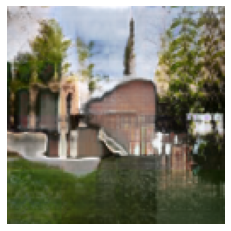

In [14]:
generate_img(args_lsun, generator_lsun)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

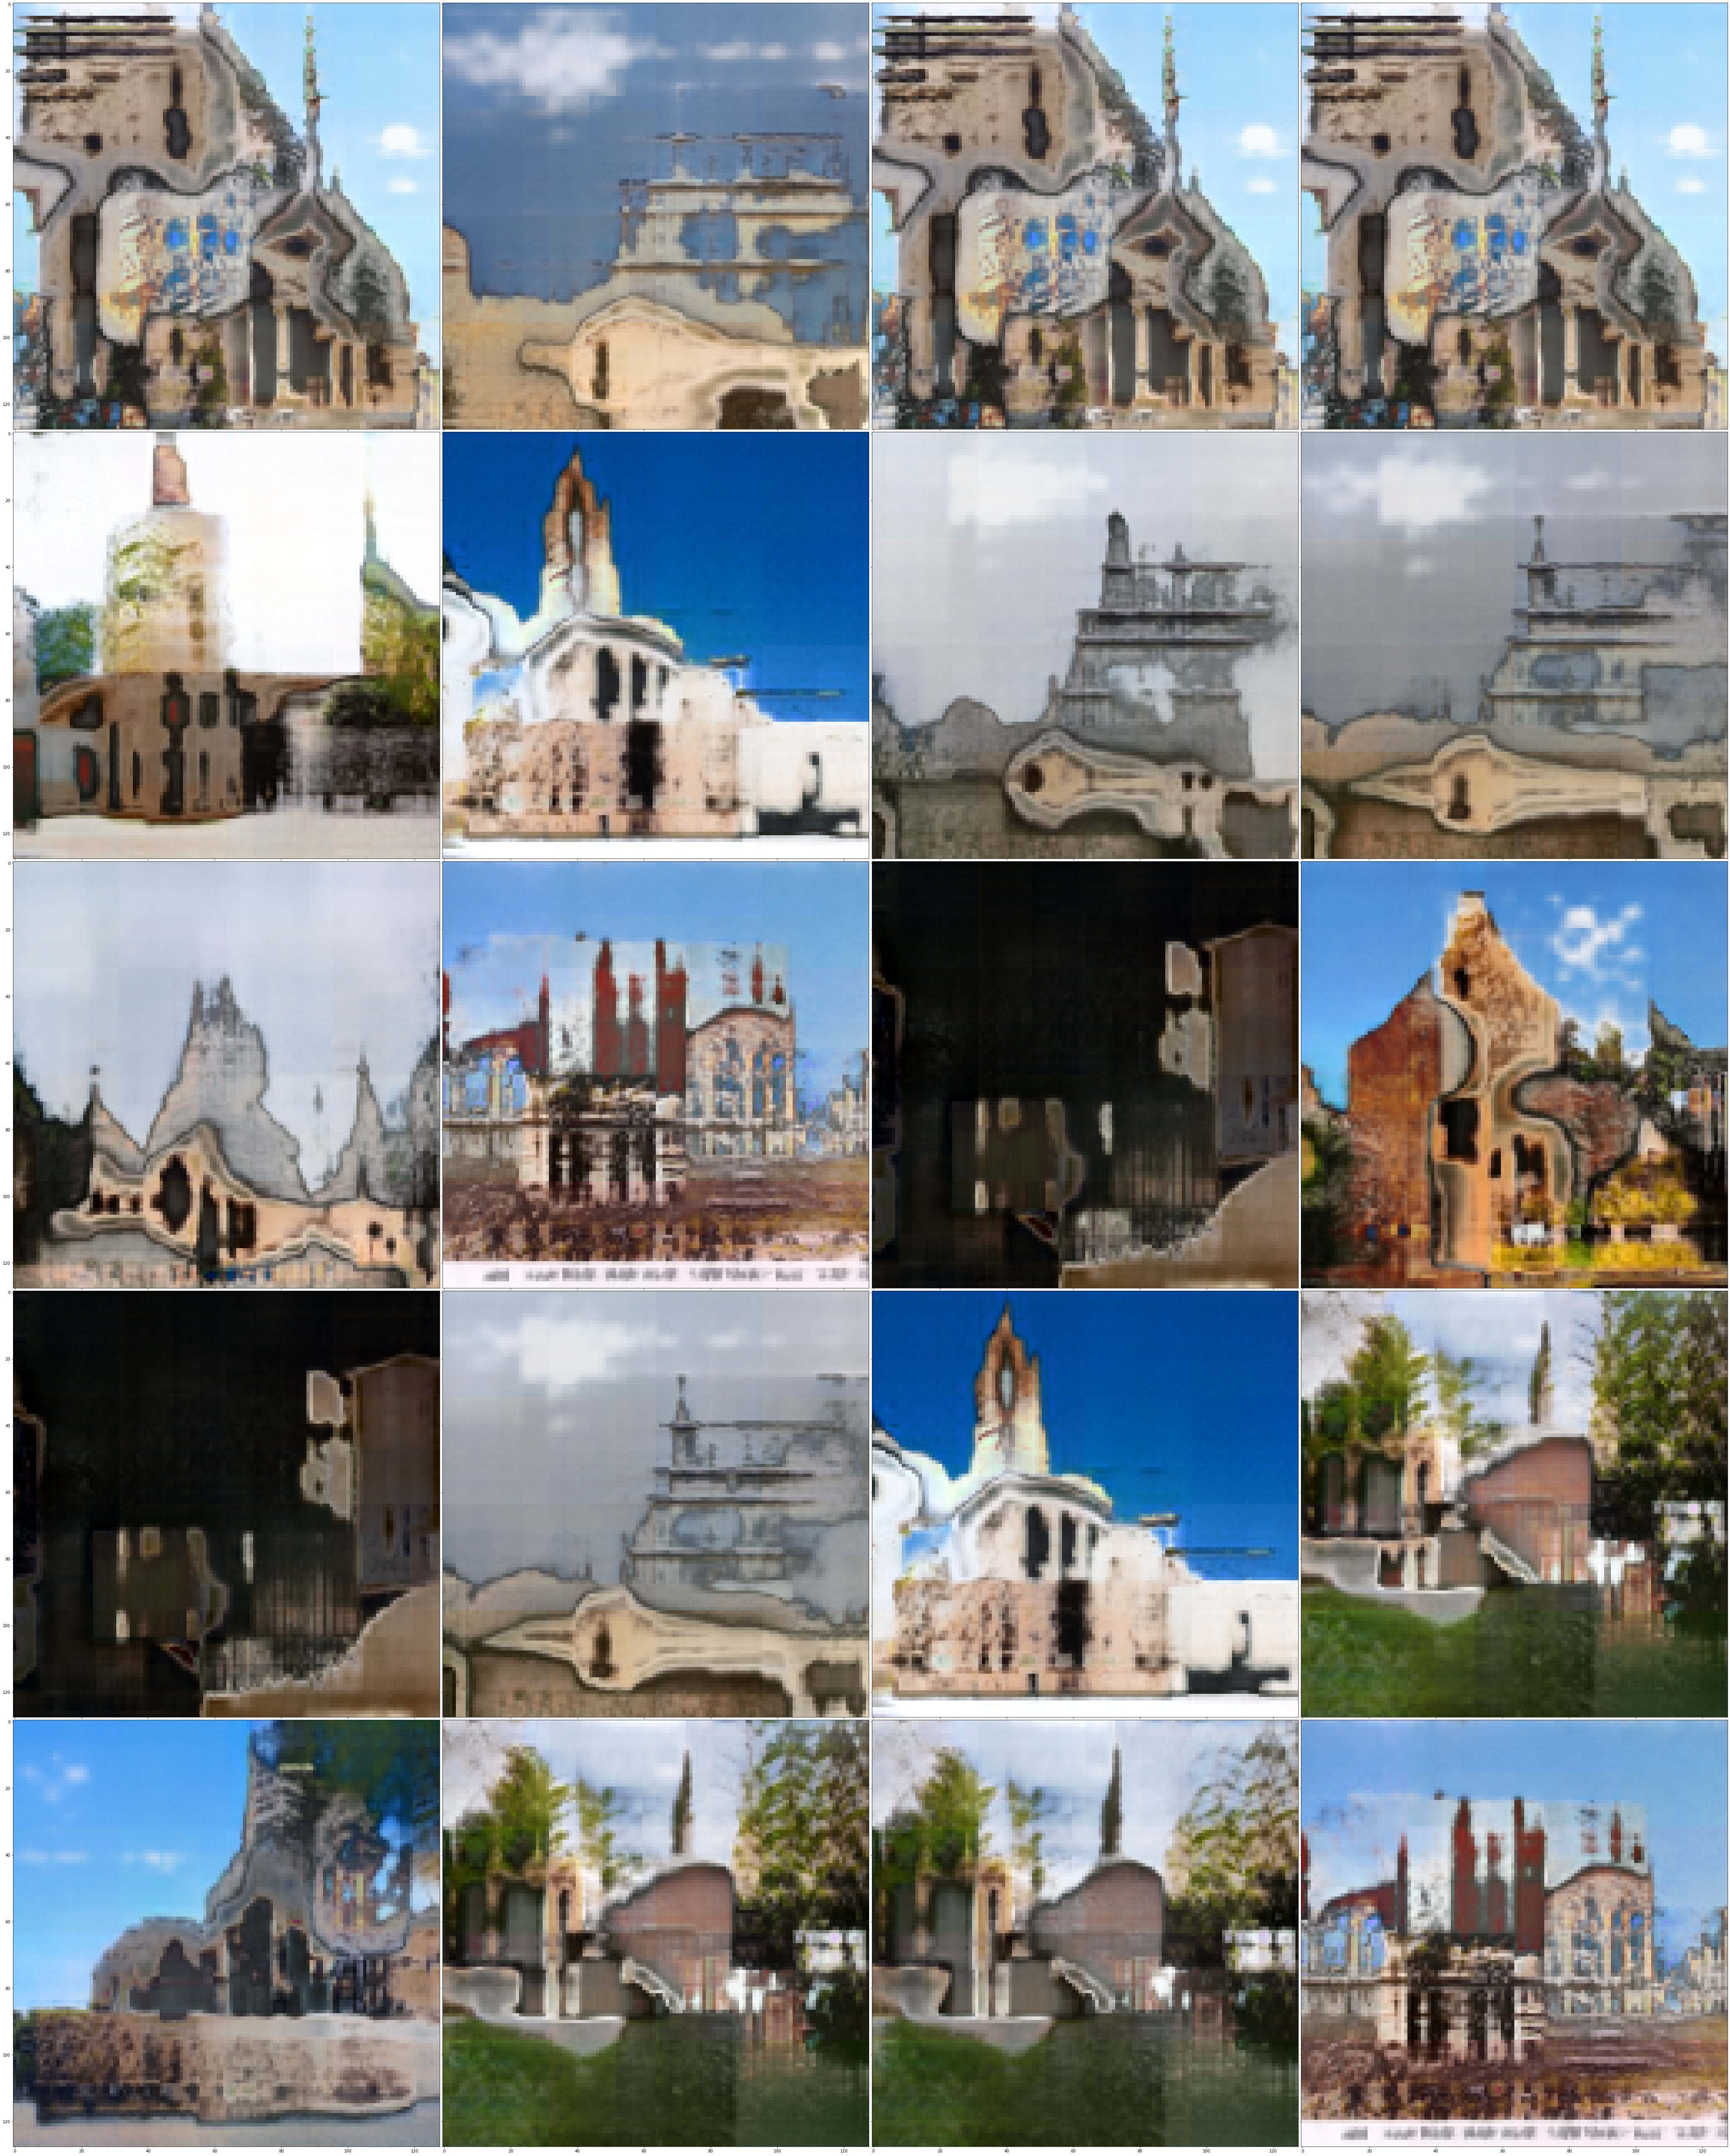

In [15]:
generate_img_grid(args_lsun, generator_lsun)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

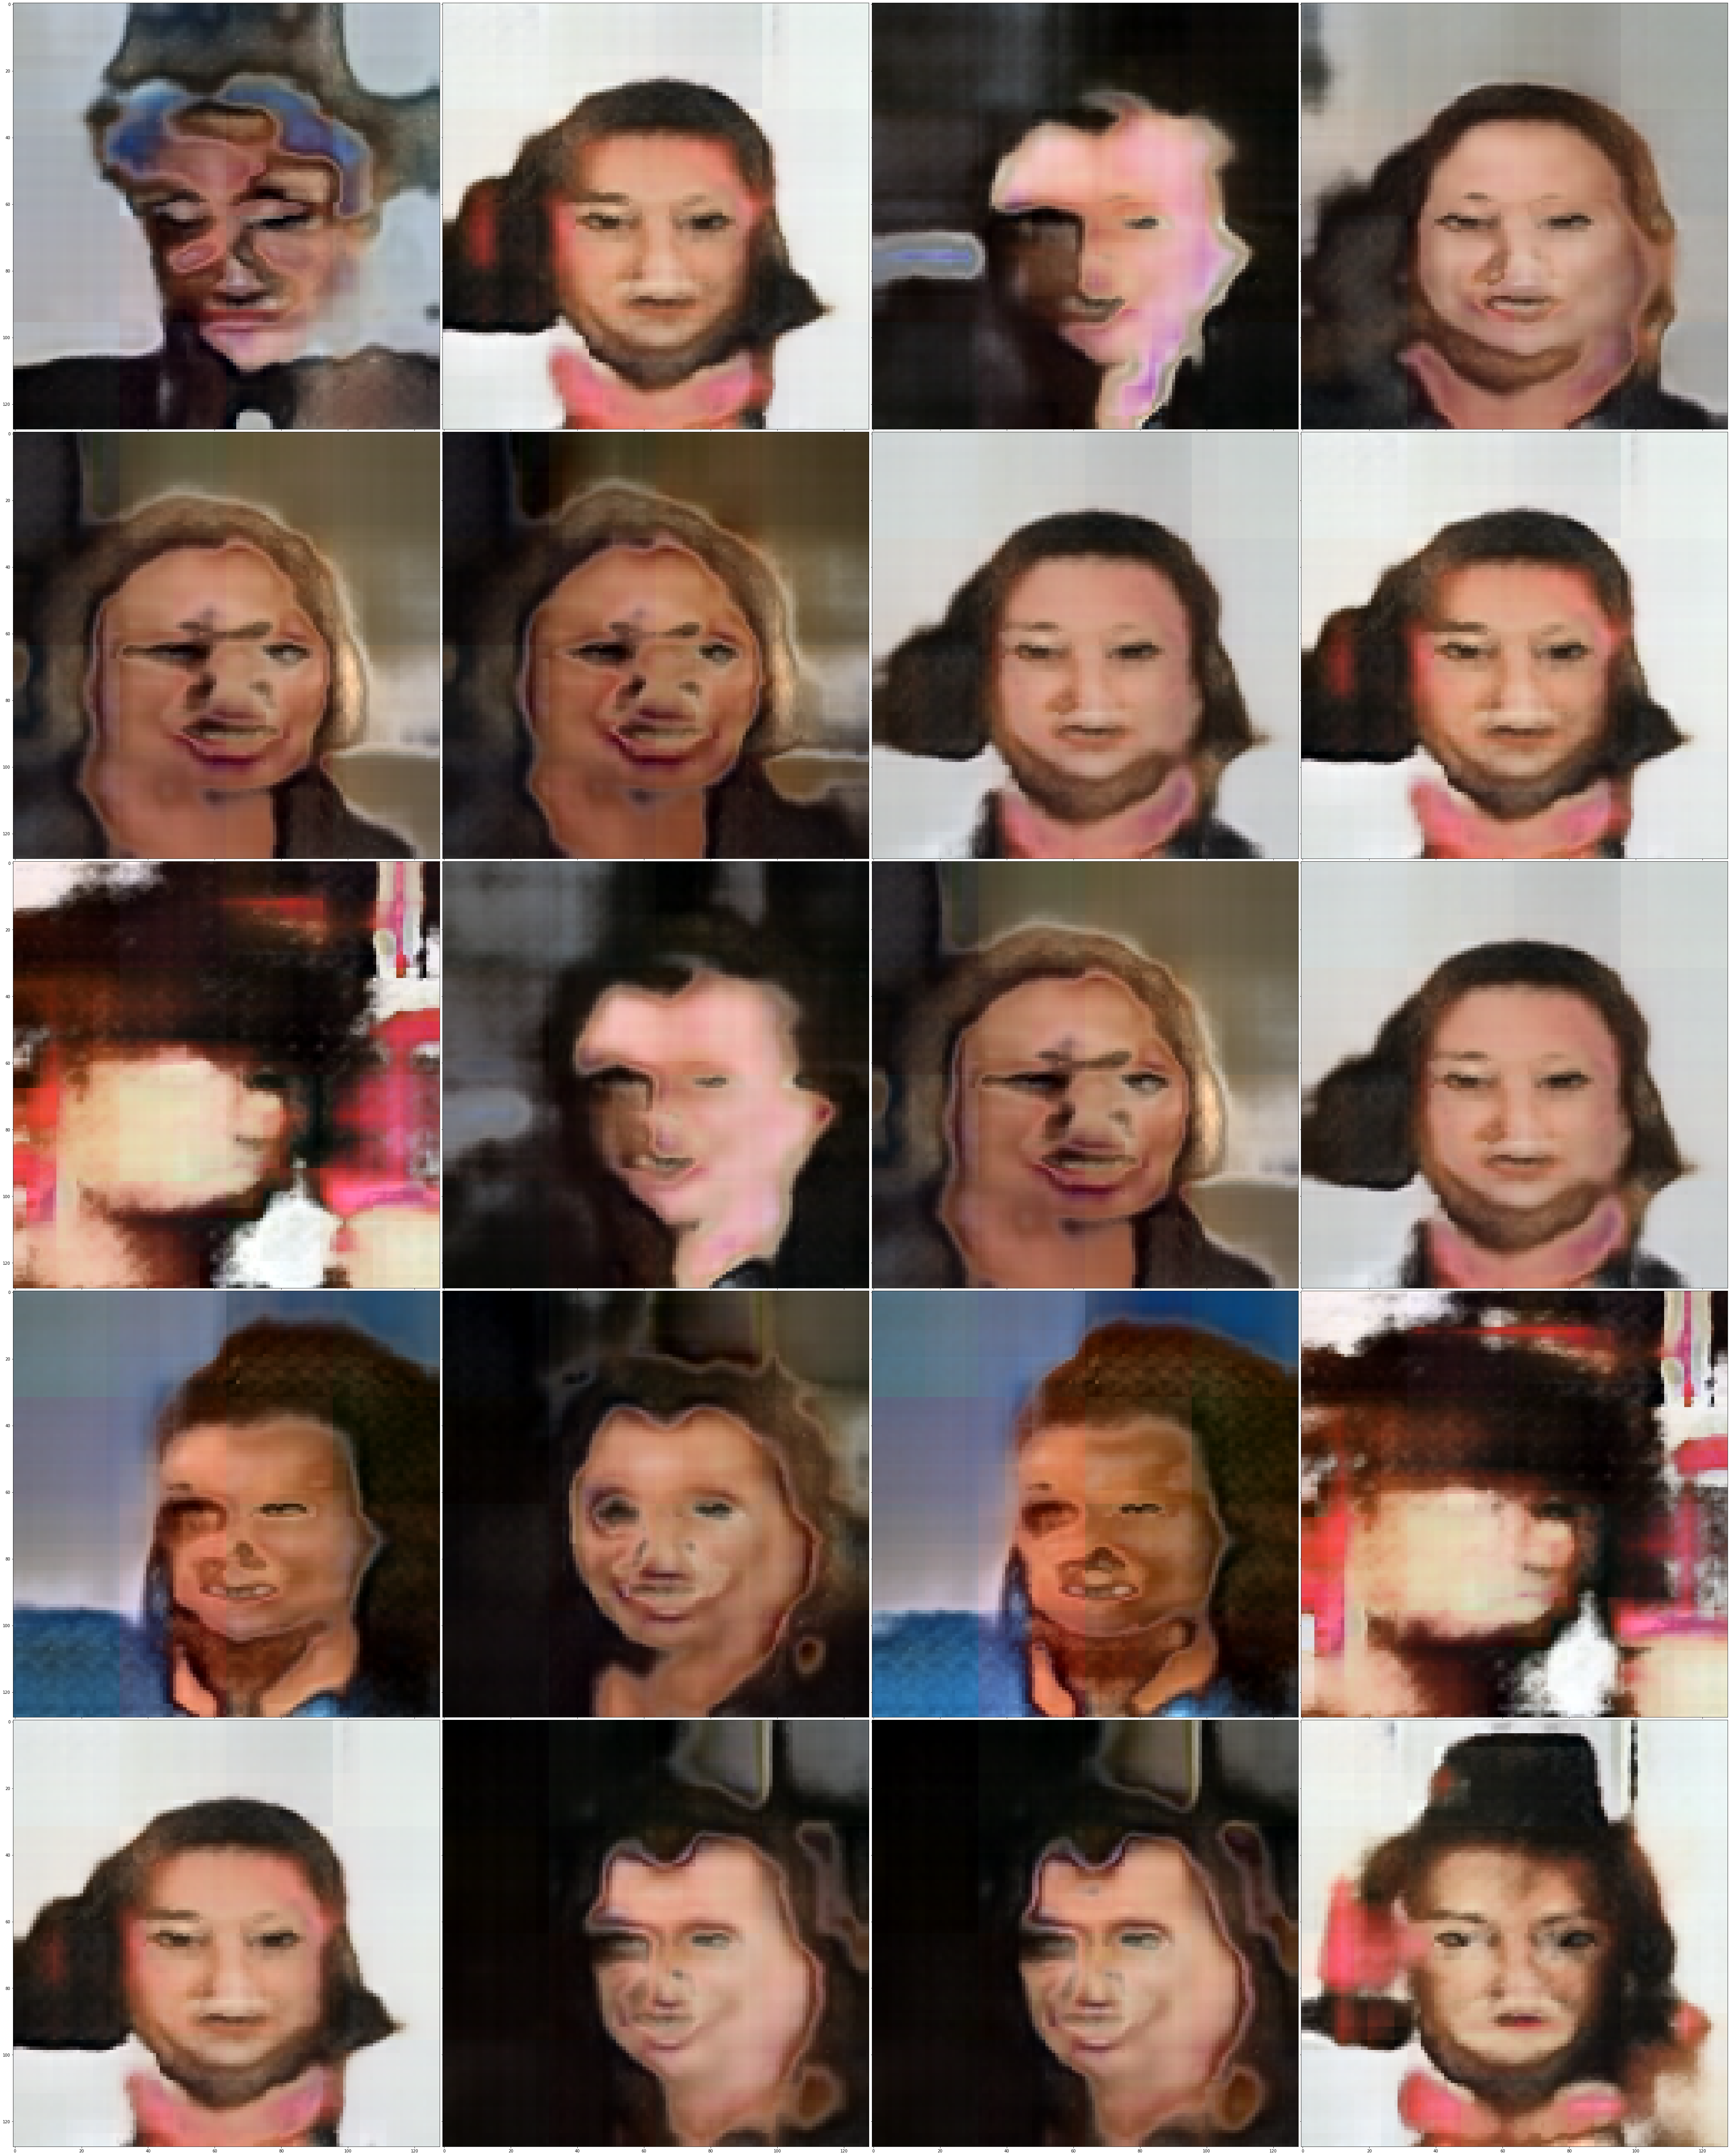

In [16]:
generate_img_grid(args_celeba, generator_celeba)

# **Quantitative Results**

Sample mean and covariance extraction

In [17]:
def sample_statistics(samples, batch_size=1):
    """
    Calculates the mean and covariance of given generated images. 
    
    Given the pretrained Inception network resize images to (299, 299) and 
    extract the statistics.

    """
    batch_size = samples.shape[0]

    # Get the Inception model
    inception = models.inception_v3(pretrained=True)
    inception.dropout = nn.Identity()
    inception.fc = nn.Identity()
    inception = inception.to(args.device)
    inception.eval()
    
    # Normalize samples
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])
    # Apply Transformation
    transform = torch.nn.Sequential(
        normalize,
        transforms.Resize((299, 299))
    )
    
    # List that statistics will be calculated
    stats = []
    with torch.no_grad():
        for s in tqdm(range(0, samples.shape[0], batch_size)):
            sample = samples[s:min(s + batch_size, samples.shape[0])]
            transformed_sample = transform(torch.tensor(sample)).to(args.device)
            feature = inception(transformed_sample).detach().cpu()
            stats.append(feature)
            
    stats = torch.cat(stats, dim=0).numpy()
    mean = np.mean(stats, axis=0)
    cov = np.cov(np.transpose(stats))
    return mean, cov


Calculation of FID Score

In [18]:
def fid_score(real_batch, fake_batch):
    # Get real data mean and covariance
    real_mean, real_cov = sample_statistics(real_batch)
    
    # Get generated data mean and covariance
    fake_mean, fake_cov = sample_statistics(fake_batch)
    
    # Calculate FID
    shur_decom = sqrtm(np.matmul(fake_cov, real_cov))
    fid = np.sum((fake_mean - real_mean) ** 2) + np.trace(fake_cov + real_cov - 2 * shur_decom)
    fid = np.real(fid)

    return fid

In [19]:
from dataset import get_data_loader

In [20]:

# LSUN FID

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transform = transforms.Compose(
            [
                transforms.Resize((args_lsun.resolution, args_lsun.resolution)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                normalize
            ]
        )
args_lsun.datasetname = 'LSUN'
args_lsun.path_data = '/home/finch/git/StyleSwin-Exp/data'

loader_lsun = get_data_loader(args_lsun.datasetname, args_lsun.path_data, args_lsun.batch, transform)

# Get real batch
real_batch = next(get_sample(loader_lsun))[0]

# Get fake batch
noise_dim = (args_lsun.batch, args_lsun.style_dim)
noise = torch.randn(noise_dim).cuda()
fake_batch = generator_lsun(noise)

# FID
fid = fid_score(real_batch, fake_batch)
print('FID Score:', fid)

  0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_38146/1438553117.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transformed_sample = transform(torch.tensor(sample)).to(args.device)
100%|██████████| 1/1 [00:00<00:00, 22.60it/s]


FID Score: 323.9242967163842


In [21]:

# CELEBA FID

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
transform = transform = transforms.Compose(
            [
                transforms.Resize((args_celeba.resolution, args_celeba.resolution)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                normalize
            ]
        )
args_celeba.datasetname = 'CELEBA'
args_celeba.path_data = '/home/finch/git/StyleSwin-Exp/data'

loader_celeba = get_data_loader(args_celeba.datasetname, args_celeba.path_data, args_celeba.batch, transform)

# Get real batch
real_batch = next(get_sample(loader_celeba))[0]

# Get fake batch
noise_dim = (args_lsun.batch, args_lsun.style_dim)
noise = torch.randn(noise_dim).cuda()
fake_batch = generator_celeba(noise)

# FID
fid = fid_score(real_batch, fake_batch)
print('FID Score:', fid)

Files already downloaded and verified


  0%|          | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_38146/1438553117.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transformed_sample = transform(torch.tensor(sample)).to(args.device)
100%|██████████| 1/1 [00:00<00:00, 23.85it/s]


FID Score: 199.91957302832947



LSUN Church with Spectral Normalization
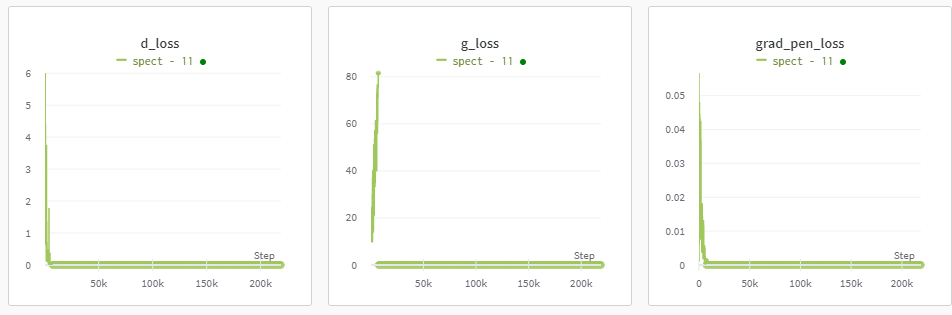

LSUN Church without Spectral Normalization
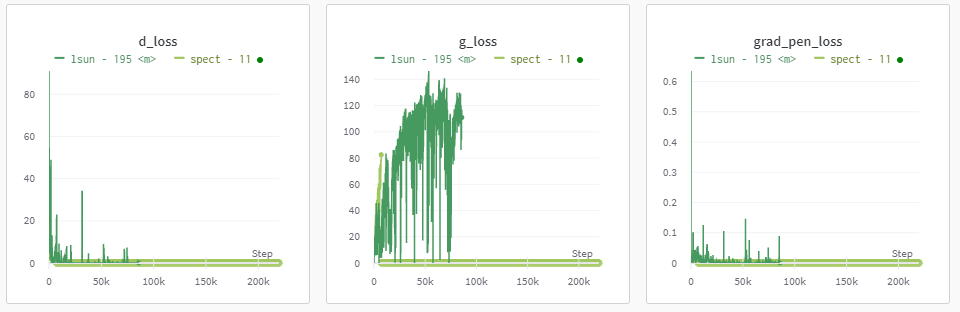

Celeb-A with Spectral Normalization
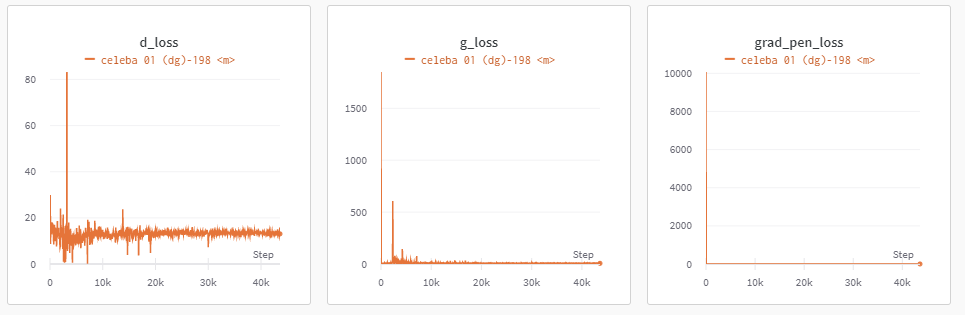

Celeb-A without Spectran Normalization
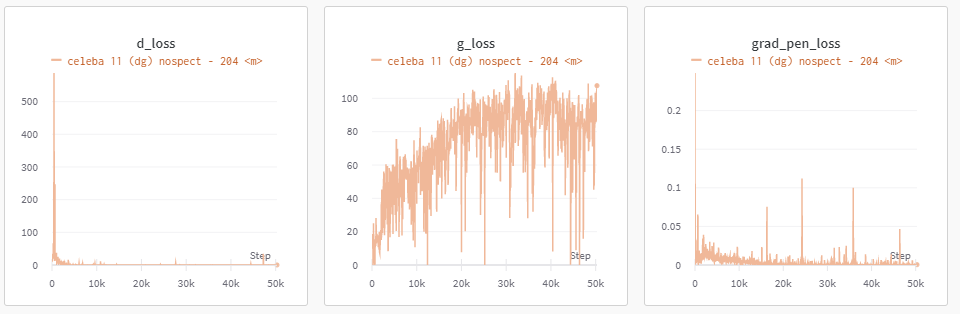

# **Challenges**

* Paper mostly explains the methods related to Generator part but when it comes to discriminator architecture, there are very little to gather information from. At first, we tried a standard convolution based architecture but results showed that training is highly unstabilized. See an example discriminator loss graph from DC-GAN like discriminator experiment below:
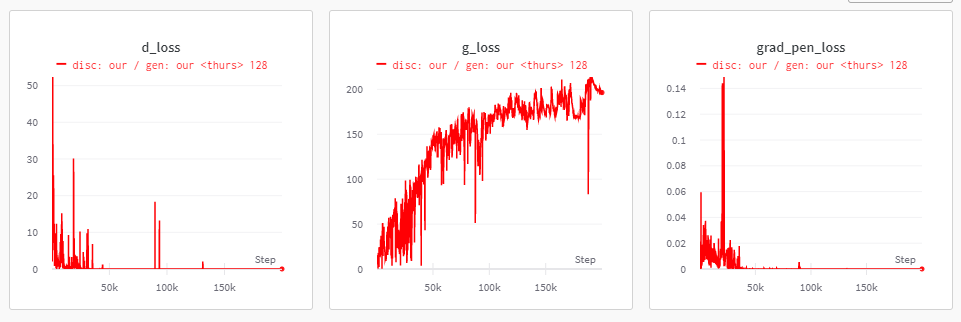
* For us the most challenging part was stabilizing the training. We noticed that training of StyleSwin is highly unstabilized when certain operations like spectral normalization on Discriminator are not employed. After applying spectral normalization on Discriminator and applying R1 Regularization, we obtained much more precise results. See an example loss graph below:
image.png
* Another challenge we had to face was the huge amount of computational power absence. Original model trained **48 Million** iterations with batch size of 32 on LSUN Church dataset which contains 256 x 256 images. Due to limited power of computation, we could managed on average 100k iterations with batch size of 4 and most importantly we couldn't manage conducting experiments on 256 x 256 LSUN images since CUDA gets out of memory. We resize the images to 128 x 128 and performed our experiments. See the training configuration of the original paper below:
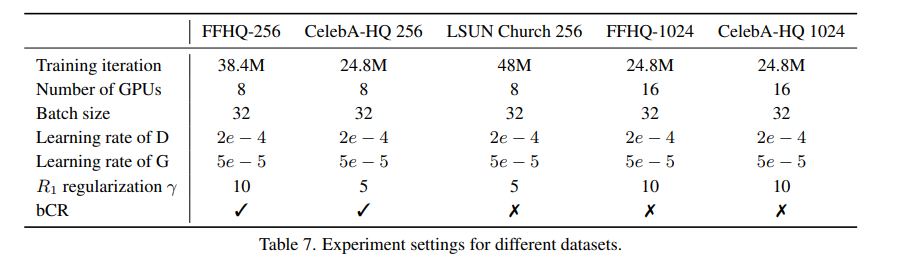

# **Acknowledgement**

🥉 Thanks to authors of the paper, and writers of the [**Sinusodial Positional Embedding**]( https://github.com/pytorch/fairseq/blob/master/fairseq/modules/sinusoidal_positional_embedding.p) and [**Swin Transformer**](https://github.com/microsoft/Swin-Transformer/blob/main/models/swin_transformer.py) repositories.

# **Citation**

```
@article{DBLP:journals/corr/abs-2112-10762,
  author    = {Bowen Zhang and
               Shuyang Gu and
               Bo Zhang and
               Jianmin Bao and
               Dong Chen and
               Fang Wen and
               Yong Wang and
               Baining Guo},
  title     = {StyleSwin: Transformer-based {GAN} for High-resolution Image Generation},
  journal   = {CoRR},
  volume    = {abs/2112.10762},
  year      = {2021},
  url       = {https://arxiv.org/abs/2112.10762},
  eprinttype = {arXiv},
  eprint    = {2112.10762},
  timestamp = {Tue, 31 May 2022 14:41:16 +0200},
  biburl    = {https://dblp.org/rec/journals/corr/abs-2112-10762.bib},
  bibsource = {dblp computer science bibliography, https://dblp.org}
```

